# Cracked Stress Analysis - Rectangular Section

## Import modules

In [55]:
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinearNoTension,
    EurocodeNonLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.prestressed_section import PrestressedSection
from concreteproperties.results import MomentCurvatureResults

## Create materials

In [56]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinearNoTension(
        elastic_modulus=30e3,
        ultimate_strain=0.003,
        compressive_strength=40,
    ),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=900e3,
)

## Create geometry

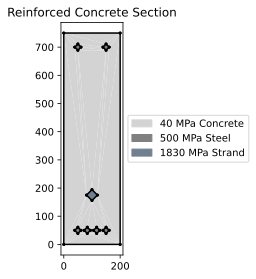

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [57]:
geom = rectangular_section(d=750, b=200, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=2, x_s=100, anchor=(50, 700)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=4, x_s=100 / 3, anchor=(50, 50)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=750,
    material=strand,
    x=100,
    y=750 - 575,
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

## Moment Curvature Analysis

In [58]:
mk_res = conc_sec.moment_curvature_analysis(kappa_mult=1.1)

Output()

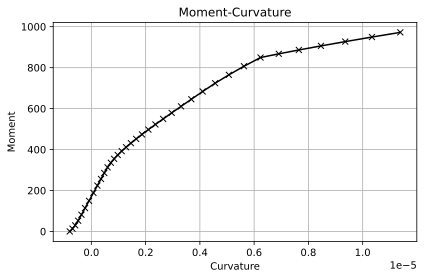

<AxesSubplot: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [59]:
mk_res.plot_results(fmt="kx-")

## Compare with textbook
![](img/rect_mk.jpg)

## Stresses at ``M=0`` kN.m and ``M=300`` kN.m

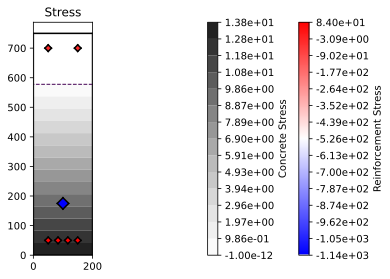

<AxesSubplot: title={'center': 'Stress'}>

In [60]:
stress = conc_sec.calculate_service_stress(
    moment_curvature_results=mk_res,
    m=None,
    kappa=mk_res.kappa[0],
)
stress.plot_stress()

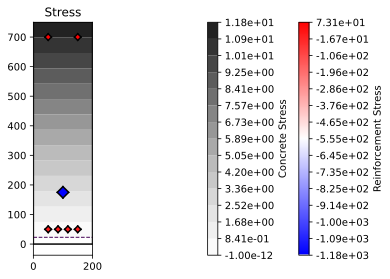

<AxesSubplot: title={'center': 'Stress'}>

In [61]:
stress = conc_sec.calculate_service_stress(
    moment_curvature_results=mk_res,
    m=300e6,
)
stress.plot_stress()

## Modify concrete material property

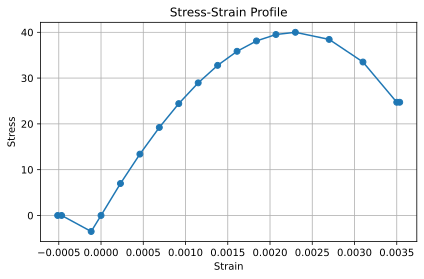

<AxesSubplot: title={'center': 'Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [65]:
concrete = Concrete(
    name="Non-Linear Concrete",
    density=2.4e-6,
    stress_strain_profile=EurocodeNonLinear(
        elastic_modulus=30e3,
        ultimate_strain=0.0035,
        compressive_strength=40,
        compressive_strain=0.0023,
        tensile_strength=3.5,
        tension_softening_stiffness=10e3,
    ),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)
concrete.stress_strain_profile.plot_stress_strain()

In [67]:
conc_sec.concrete_geometries[0].material = concrete

In [68]:
mk_res_nl = conc_sec.moment_curvature_analysis(kappa_mult=1.1)

Output()

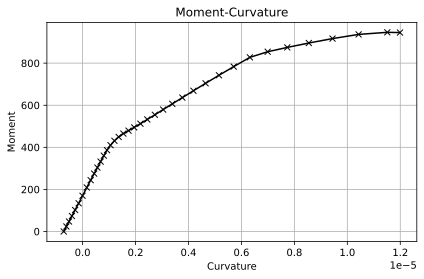

<AxesSubplot: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [69]:
mk_res_nl.plot_results(fmt="kx-")

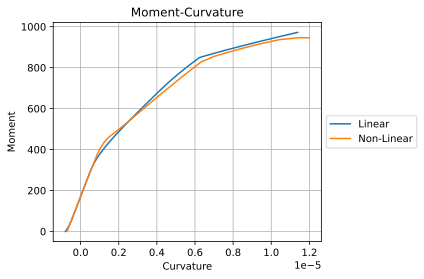

<AxesSubplot: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [71]:
MomentCurvatureResults.plot_multiple_results(
    moment_curvature_results=[mk_res, mk_res_nl],
    labels=["Linear", "Non-Linear"],
    fmt="-",
)